Iteración 0, costo = 10.447067422003514, w = 1.0455968404390072, b = 0.04403258003633615
Iteración 10, costo = 7.149895482655327, w = 1.450882026201494, b = 0.43606731370103713
Iteración 20, costo = 5.010539047218099, w = 1.776839843422207, b = 0.7523749158679145
Iteración 30, costo = 3.6224120553268992, w = 2.038987191882052, b = 1.0075935288792146
Iteración 40, costo = 2.721712444849402, w = 2.249807512028182, b = 1.2135299050683923
Iteración 50, costo = 2.13727812289322, w = 2.4193435063600344, b = 1.3797073893099951
Iteración 60, costo = 1.758053383393222, w = 2.555674098615247, b = 1.5138077898756221
Iteración 70, costo = 1.5119808823965337, w = 2.6652982307518087, b = 1.6220276949611638
Iteración 80, costo = 1.352306497390904, w = 2.753443687154627, b = 1.7093658078826386
Iteración 90, costo = 1.2486936863690383, w = 2.8243155854094297, b = 1.7798546621101692
Iteración 100, costo = 1.1814582855511728, w = 2.881296315555688, b = 1.8367474881792294
Iteración 110, costo = 1.13782788

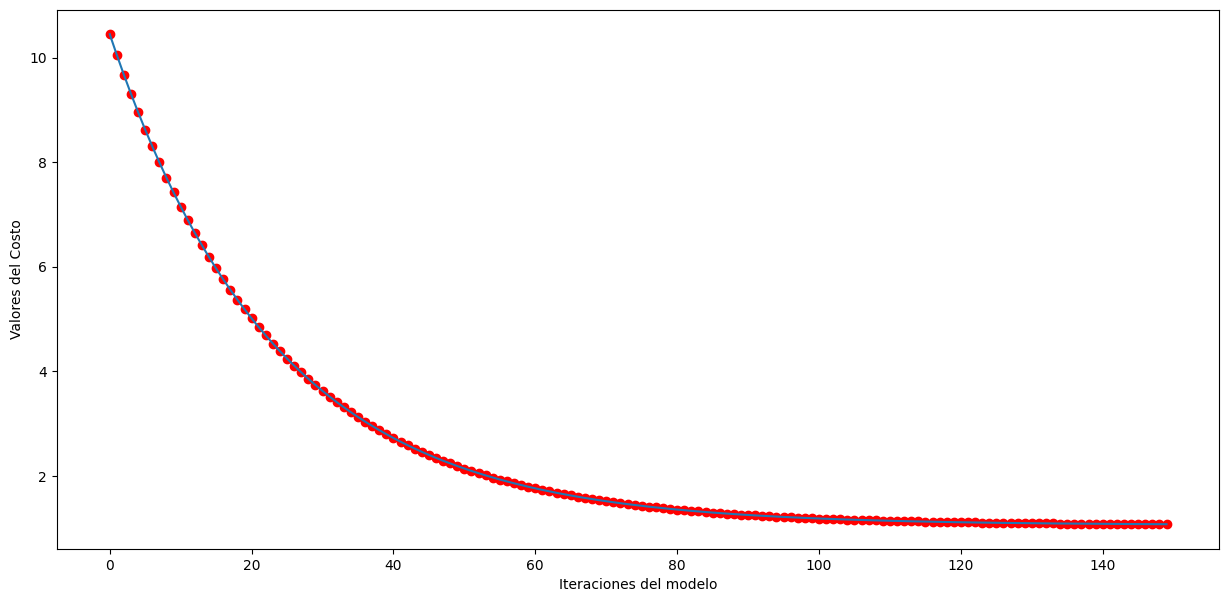

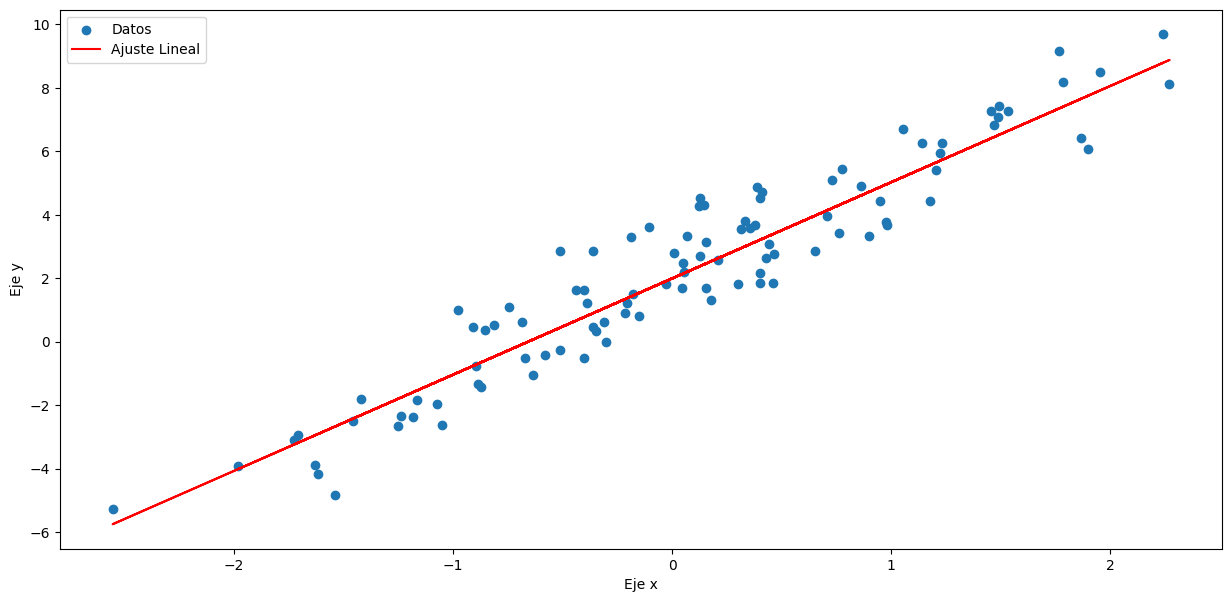

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # Fijar la semilla para reproducibilidad
x = np.random.randn(100) # Generar 100 características aleatorias
y = 3 * x + 2 + np.random.randn(100) # Generar 100 etiquetas con ruido
iteraciones = 150

# Función de costo
def costo(w, b, x, y):
    return np.mean(((w * x + b) - y) ** 2)

# Gradiente de la función de costo
def gradiente_w(w, b, x, y):
    return 2 * np.mean(((w * x + b) - y) * x)

def gradiente_b(w, b, x, y):
    return 2 * np.mean(((w * x + b) - y))

# Descenso de gradiente tipo Batch
def descenso_gradiente(w, b, x, y, alpha, iteraciones):
    # Inicializar el historial de costo y parámetro
    historial_costo = []
    historial_w = [w]
    historial_b = [b]

    # Repetir hasta alcanzar el número máximo de iteraciones
    for i in range(iteraciones):
        # Calcular el costo y los gradientes para los parámetros actuales
        costo_actual = costo(w, b, x, y)
        gradiente_w_actual = gradiente_w(w, b, x, y)
        gradiente_b_actual = gradiente_b(w, b, x, y)

        # Actualizar los parámetros usando la regla del descenso de gradiente
        w = w - alpha * gradiente_w_actual
        b = b - alpha * gradiente_b_actual

        # Guardar el costo y los parámetros actuales en el historial
        historial_costo.append(costo_actual)
        historial_w.append(w)
        historial_b.append(b)

        # Mostrar el progreso cada 10 iteraciones
        if i % 10 == 0:
            print(f"Iteración {i}, costo = {costo_actual}, w = {w}, b = {b}")

    # Devolver el historial de costo, parámetros w y b
    return historial_costo, historial_w, historial_b

# Llamada a la función descenso_gradiente con valores iniciales
w_inicial = 1.0  # Cambia este valor si lo deseas
b_inicial = 0.0  # Valor inicial para el sesgo
alpha = 0.01  # Cambia la tasa de aprendizaje si lo deseas
historial_costo, historial_w, historial_b = descenso_gradiente(w_inicial, b_inicial, x, y, alpha, iteraciones)

# Imprimir el valor final de i (número total de iteraciones)
print(f"Valor final de i: {iteraciones - 1}")
#Graficamos el valor del costo MSE.
plt.figure(figsize=(15,7))
plt.plot(historial_costo,label='MSE')

plt.scatter(range(iteraciones), historial_costo, color='red', marker='o', label='Saltos descenso de gradiente')
plt.xlabel("Iteraciones del modelo")

plt.ylabel("Valores del Costo")
plt.show()
plt.figure(figsize=(15,7))
plt.scatter(x,y, label='Datos')
plt.plot(x,historial_w[-1]*x+historial_b[-1],color='red',label='Ajuste Lineal')
plt.xlabel('Eje x')
plt.ylabel('Eje y')
plt.legend()
plt.show()

